In [8]:
# Step 1: 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from datetime import datetime
from statsmodels.tsa.stattools import arma_order_select_ic


# Step 2: 读取数据
file_path = 'D:goldprice.xlsx'
data = pd.read_excel(file_path)

# 检查数据
print(data.head())

# Step 3: 数据预处理
# 假设数据有日期列和价格列
data['date'] = pd.to_datetime(data['date'])  # 将日期列转换为datetime类型
data.set_index('date', inplace=True)  # 将日期列设置为索引
price_series = data['price']  # 选择价格列

# 检查是否有缺失值并处理
price_series = price_series.dropna()



        date    price
0 2010-01-31  1078.50
1 2010-02-28  1108.25
2 2010-03-31  1115.50
3 2010-04-30  1179.25
4 2010-05-31  1207.50


原始数据单位根检验结果:
ADF Statistic: -1.2860470508239192
p-value: 0.6355313841037978
一阶差分后单位根检验结果:
ADF Statistic: -14.535322151730426
p-value: 5.250631105588649e-27


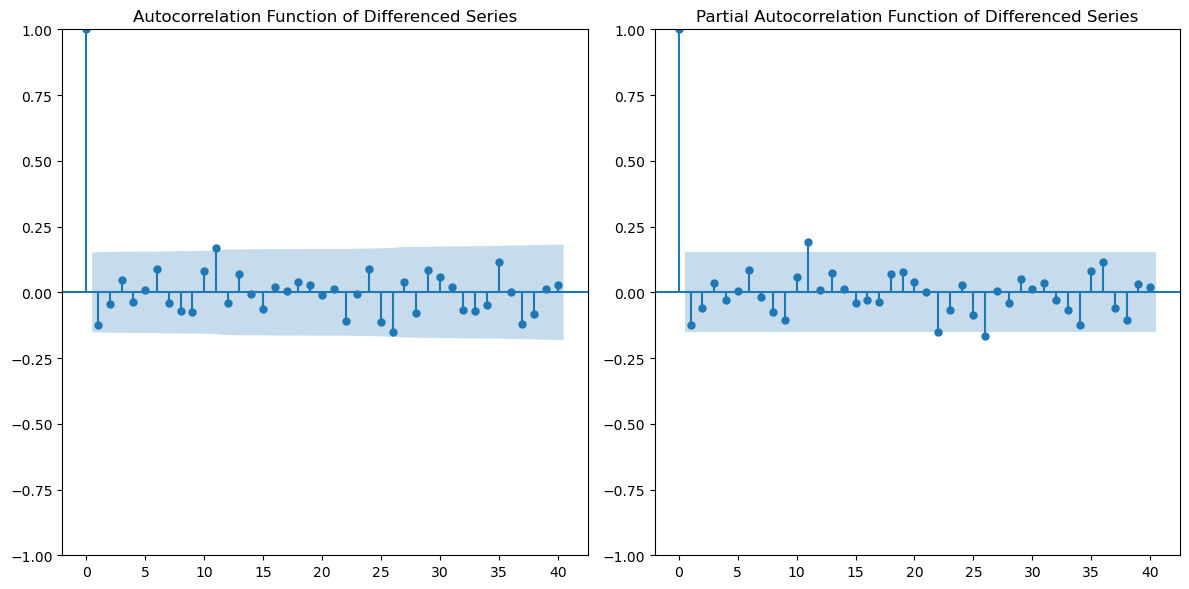

c:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization

AIC和BIC定阶结果:
{'aic':              0            1            2            3            4   \
0   1890.872909  1889.944349  1891.741995  1893.490796  1895.395772   
1   1890.222789  1891.816948  1893.511864  1895.426919  1897.376041   
2   1891.608235  1893.390095  1895.224861  1891.654149  1892.475932   
3   1893.419661  1895.353322  1897.377112  1893.302303  1895.651554   
4   1895.259473  1897.259014  1893.231251  1895.911596  1894.457027   
5   1897.256423  1899.024246  1895.097776  1897.213932  1898.266154   
6   1898.002392  1899.982659  1896.945297  1899.128867  1900.689108   
7   1899.952522  1901.537887  1894.694988  1897.520351          NaN   
8   1901.016251  1902.536421  1898.018011  1898.938047  1901.165439   
9   1901.077692  1902.937539  1901.732508  1904.295561  1899.796497   
10  1902.428333  1900.755975  1899.818421  1901.684282  1901.622027   

             5            6            7            8            9   \
0   1897.278634  1898.111785  1899.098618  1898.724332 

c:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
# Step 4: 平稳性检验
# 对原始数据进行平稳性检验
adf_result = adfuller(price_series)
print('原始数据单位根检验结果:')
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# 对一阶差分数据进行平稳性检验
diff_price_series = price_series.diff().dropna()
adf_diff_result = adfuller(diff_price_series)
print('一阶差分后单位根检验结果:')
print(f'ADF Statistic: {adf_diff_result[0]}')
print(f'p-value: {adf_diff_result[1]}')

# 绘制一阶差分的自相关图和偏自相关图
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(diff_price_series, ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function of Differenced Series')

plt.subplot(122)
plot_pacf(diff_price_series, ax=plt.gca(), lags=40)
plt.title('Partial Autocorrelation Function of Differenced Series')

plt.tight_layout()
plt.show()

order_selection = arma_order_select_ic(diff_price_series, max_ar=10, max_ma=10, ic=['aic', 'bic'])
print('AIC和BIC定阶结果:')
print(order_selection)

# 获取AIC和BIC最优的(p, q)值
p, q = order_selection.aic_min_order
print(f'选择的ARIMA模型参数: p={p}, d=1, q={q}')

c:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-in

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  168
Model:                 ARIMA(7, 1, 4)   Log Likelihood                -939.268
Date:                Fri, 26 Jul 2024   AIC                           1902.535
Time:                        13:29:09   BIC                           1939.951
Sample:                    01-31-2010   HQIC                          1917.722
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4711     16.785     -0.028      0.978     -33.369      32.427
ar.L2         -0.6222      7.023     -0.089      0.929     -14.386      13.142
ar.L3         -0.5587     15.502     -0.036      0.9

c:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.123e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\anaconda3\Lib\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64,

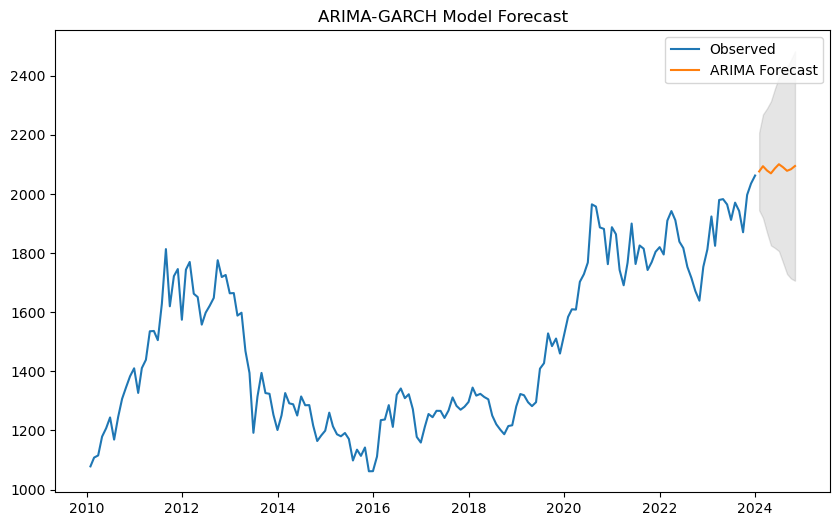

ARIMA预测值： 2024-01-31    2076.182930
2024-02-29    2093.977289
2024-03-31    2079.366120
2024-04-30    2069.741734
2024-05-31    2086.842344
2024-06-30    2100.581207
2024-07-31    2090.646400
2024-08-31    2078.401526
2024-09-30    2083.615450
2024-10-31    2094.625090
Freq: M, Name: predicted_mean, dtype: float64
GARCH预测均值： date
2023-12-31    5.664364
Name: h.10, dtype: float64
GARCH预测方差： date
2023-12-31    4631.796586
Name: h.10, dtype: float64


In [11]:
# Step 5: ARIMA模型拟合
# 选择合适的p, d, q参数，这里的（7,1,4）参数
arima_model = ARIMA(price_series, order=(7, 1, 4))
arima_fitted = arima_model.fit()

# 检查模型摘要
print(arima_fitted.summary())

# 提取ARIMA模型的残差
residuals = arima_fitted.resid

# Step 6: GARCH模型拟合
# 使用残差拟合GARCH模型
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_fitted = garch_model.fit(disp='off')

# 检查模型摘要
print(garch_fitted.summary())

# Step 7: 预测与评估
# ARIMA预测
arima_forecast = arima_fitted.get_forecast(steps=10)  # 预测未来10步
arima_forecast_values = arima_forecast.predicted_mean
arima_forecast_ci = arima_forecast.conf_int()

# GARCH预测
garch_forecast = garch_fitted.forecast(horizon=10)
garch_forecast_values = garch_forecast.mean['h.10']
garch_forecast_variance = garch_forecast.variance['h.10']

# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.plot(price_series, label='Observed')
plt.plot(arima_forecast_values, label='ARIMA Forecast')
plt.fill_between(arima_forecast_ci.index, arima_forecast_ci.iloc[:, 0], arima_forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.legend()
plt.title('ARIMA-GARCH Model Forecast')
plt.show()

# 输出预测结果
print("ARIMA预测值：", arima_forecast_values)
print("GARCH预测均值：", garch_forecast_values)
print("GARCH预测方差：", garch_forecast_variance)